<a href="https://colab.research.google.com/github/hayleypc/HawaiiClimate/blob/main/Maui_timeseries_analysis_20251028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Load carbon data
carbon = gpd.read_file(
    '/content/joined_carbon_predictions_6.gpkg'
)

In [41]:
# for col in carbon.columns:
#     print(col)

In [6]:
# Define climate bins
bin_descriptions = {
    1: "cool / all rainfall",
    10: "moderate temperature / low-moderate rainfall",
    11: "moderate temperature / high rainfall",
    20: "warm / low rainfall",
    21: "warm / moderate-high rainfall"
}

# Convert to int first, then map
carbon['climate_description'] = carbon['climate_bin1'].dropna().astype(int).map(bin_descriptions)

# # Check the result
# print(carbon[['climate_bin1', 'climate_description']].head(10))

   climate_bin1                           climate_description
0          10.0  moderate temperature / low-moderate rainfall
1          10.0  moderate temperature / low-moderate rainfall
2          10.0  moderate temperature / low-moderate rainfall
3          10.0  moderate temperature / low-moderate rainfall
4          10.0  moderate temperature / low-moderate rainfall
5          10.0  moderate temperature / low-moderate rainfall
6          10.0  moderate temperature / low-moderate rainfall
7          10.0  moderate temperature / low-moderate rainfall
8          10.0  moderate temperature / low-moderate rainfall
9          10.0  moderate temperature / low-moderate rainfall


In [11]:
# Get all unique values across all 5 columns
all_unique_values = pd.concat([
    carbon['Ag_year'],
    carbon['2015Ag_year'],
    carbon['Ab2015Ag_year'],
    carbon['Ab2020Ag_year'],
    carbon['2020Ag_year']
]).unique()

print("All unique land use categories:")
print(all_unique_values)
print(f"\nTotal unique categories: {len(all_unique_values)}")

All unique land use categories:
['1980_Unk' '1980_Field Crops' '1980_Rangeland' '1980_Pineapple' None
 '1980_Sugarcane' '1980_Orchards' '2015_Diversified' '2015_Rangeland'
 '2015_Pineapple' '2015_Banana' '2015_Coffee' '2015_Sugarcane'
 '2015_Tropical Fruit' '2015_Kalo' '2015_Abandoned' '2020_Abandoned'
 '2020_Diversified' '2020_Rangeland' '2020_Pineapple'
 '2020_Tropical Fruit' '2020_Banana' '2020_Coffee']

Total unique categories: 23


In [21]:
# Set pandas to display all rows
pd.set_option('display.max_rows', None)

# Get all unique combinations with counts
unique_combos = carbon.groupby(['Ag_year', '2015Ag_year', 'Ab2015Ag_year',
                                'Ab2020Ag_year', '2020Ag_year'],
                               dropna=False).size().reset_index(name='count')

# Sort for easier viewing
# unique_combos = unique_combos.sort_values(by=['Ag_year', '2015Ag_year', 'Ab2015Ag_year',
#                                                'Ab2020Ag_year', '2020Ag_year'])
unique_combos = unique_combos.sort_values('count', ascending=False)

# Reset index
unique_combos = unique_combos.reset_index(drop=True)

print(f"Total unique combinations: {len(unique_combos)}")
display(unique_combos)

Total unique combinations: 135


,Ag_year,2015Ag_year,Ab2015Ag_year,Ab2020Ag_year,2020Ag_year,count
0,1980_Sugarcane,2015_Sugarcane,NaN,2020_Abandoned,NaN,130174
1,1980_Rangeland,2015_Rangeland,NaN,NaN,2020_Rangeland,75726
2,NaN,NaN,NaN,NaN,NaN,61190
3,1980_Sugarcane,2015_Sugarcane,NaN,NaN,2020_Rangeland,26454
4,1980_Unk,NaN,2015_Abandoned,NaN,NaN,23657
5,1980_Pineapple,NaN,2015_Abandoned,NaN,NaN,11848
6,1980_Sugarcane,NaN,2015_Abandoned,NaN,NaN,11114
7,1980_Sugarcane,2015_Sugarcane,NaN,NaN,2020_Diversified,10573
8,1980_Sugarcane,NaN,NaN,NaN,NaN,9922
9,1980_Rangeland,NaN,2015_Abandoned,NaN,NaN,6179


In [32]:
# Create a list of the indices to keep
indices_to_keep = [0, 1, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21,
                   23, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41,
                   42, 44, 45, 49, 60, 61]

# Filter the unique_combos dataframe
subset_combos = unique_combos.loc[indices_to_keep].reset_index(drop=True)

print(f"Subset has {len(subset_combos)} combinations")
display(subset_combos)

Subset has 39 combinations


,Ag_year,2015Ag_year,Ab2015Ag_year,Ab2020Ag_year,2020Ag_year,count
0,1980_Sugarcane,2015_Sugarcane,NaN,2020_Abandoned,NaN,130174
1,1980_Rangeland,2015_Rangeland,NaN,NaN,2020_Rangeland,75726
2,1980_Pineapple,NaN,2015_Abandoned,NaN,NaN,11848
3,1980_Sugarcane,NaN,2015_Abandoned,NaN,NaN,11114
4,1980_Sugarcane,2015_Sugarcane,NaN,NaN,2020_Diversified,10573
5,1980_Rangeland,NaN,2015_Abandoned,NaN,NaN,6179
6,1980_Pineapple,2015_Rangeland,NaN,NaN,2020_Rangeland,4031
7,1980_Pineapple,2015_Pineapple,NaN,NaN,2020_Pineapple,3857
8,1980_Field Crops,NaN,2015_Abandoned,NaN,NaN,3515
9,1980_Sugarcane,2015_Sugarcane,NaN,NaN,2020_Tropical Fruit,3020


In [34]:
subset_combos = subset_combos.drop(33).reset_index(drop=True)

# Priority: 2015_Abandoned first, then 2020_Abandoned, then keep existing 2020Ag_year
subset_combos['2020Ag_year'] = subset_combos['2020Ag_year'].fillna(
    subset_combos['Ab2015Ag_year']
).fillna(subset_combos['Ab2020Ag_year'])

display(subset_combos)

,Ag_year,2015Ag_year,Ab2015Ag_year,Ab2020Ag_year,2020Ag_year,count
0,1980_Sugarcane,2015_Sugarcane,NaN,2020_Abandoned,2020_Abandoned,130174
1,1980_Rangeland,2015_Rangeland,NaN,NaN,2020_Rangeland,75726
2,1980_Pineapple,NaN,2015_Abandoned,NaN,2015_Abandoned,11848
3,1980_Sugarcane,NaN,2015_Abandoned,NaN,2015_Abandoned,11114
4,1980_Sugarcane,2015_Sugarcane,NaN,NaN,2020_Diversified,10573
5,1980_Rangeland,NaN,2015_Abandoned,NaN,2015_Abandoned,6179
6,1980_Pineapple,2015_Rangeland,NaN,NaN,2020_Rangeland,4031
7,1980_Pineapple,2015_Pineapple,NaN,NaN,2020_Pineapple,3857
8,1980_Field Crops,NaN,2015_Abandoned,NaN,2015_Abandoned,3515
9,1980_Sugarcane,2015_Sugarcane,NaN,NaN,2020_Tropical Fruit,3020


In [36]:
subset_combos = subset_combos.drop(columns=['Ab2015Ag_year', 'Ab2020Ag_year'])

KeyError: "['Ab2015Ag_year', 'Ab2020Ag_year'] not found in axis"

In [37]:
display(subset_combos)

,Ag_year,2015Ag_year,2020Ag_year,count
0,1980_Sugarcane,2015_Sugarcane,2020_Abandoned,130174
1,1980_Rangeland,2015_Rangeland,2020_Rangeland,75726
2,1980_Pineapple,NaN,2015_Abandoned,11848
3,1980_Sugarcane,NaN,2015_Abandoned,11114
4,1980_Sugarcane,2015_Sugarcane,2020_Diversified,10573
5,1980_Rangeland,NaN,2015_Abandoned,6179
6,1980_Pineapple,2015_Rangeland,2020_Rangeland,4031
7,1980_Pineapple,2015_Pineapple,2020_Pineapple,3857
8,1980_Field Crops,NaN,2015_Abandoned,3515
9,1980_Sugarcane,2015_Sugarcane,2020_Tropical Fruit,3020


In [38]:
# Merge carbon with subset_combos to keep only rows that match the subset combinations
carbon_subset = carbon.merge(
    subset_combos[['Ag_year', '2015Ag_year', '2020Ag_year']],
    on=['Ag_year', '2015Ag_year', '2020Ag_year'],
    how='inner'
)

# Drop the abandoned columns from the result
carbon_subset = carbon_subset.drop(columns=['Ab2015Ag_year', 'Ab2020Ag_year'])

print(f"Original data: {len(carbon)} points")
print(f"Filtered data: {len(carbon_subset)} points")
print(f"Columns: {carbon_subset.columns.tolist()}")
display(carbon_subset.head())

Original data: 407479 points
Filtered data: 110427 points
Columns: ['id', 'lat', 'lon', 'lat_lon_id', 'landsat_9_unique_locs_id', 'landsat_9_unique_locs_min_dis', 'landsat_8_unique_locs_id', 'landsat_8_unique_locs_min_dis', 'landsat_7_unique_locs_id', 'landsat_7_unique_locs_min_dis', 'landsat_5_unique_locs_id', 'landsat_5_unique_locs_min_dis', 'terrain_SRTM_unique_locs_id', 'terrain_SRTM_unique_locs_min_dis', 'terrain_aspect_unique_locs_id', 'terrain_aspect_unique_locs_min_dis', 'terraclimate_unique_locs_id', 'terraclimate_unique_locs_min_dis', 'terrain_elevation_unique_locs_id', 'terrain_elevation_unique_locs_min_dis', 'terrain_slope_unique_locs_id', 'terrain_slope_unique_locs_min_dis', 'd_20161217', 'd_20170116', 'd_20170215', 'd_20170317', 'd_20170416', 'd_20170516', 'd_20170615', 'd_20170715', 'd_20170814', 'd_20170913', 'd_20171013', 'd_20171112', 'd_20171212', 'd_20180111', 'd_20180210', 'd_20180312', 'd_20180411', 'd_20180511', 'd_20180610', 'd_20180710', 'd_20180809', 'd_201809

,id,lat,lon,lat_lon_id,landsat_9_unique_locs_id,landsat_9_unique_locs_min_dis,landsat_8_unique_locs_id,landsat_8_unique_locs_min_dis,landsat_7_unique_locs_id,landsat_7_unique_locs_min_dis,...,d_20240906,d_20241006,d_20241105,d_20241205,Ag_year,2015Ag_year,2020Ag_year,climate_bin1,geometry,climate_description
0,158581,-156.352210,20.810001,158580,174202.0,0.0,158581.0,0.0,240111.0,0.0,...,3.465361,3.136239,3.376687,3.491846,1980_Field Crops,2015_Diversified,2020_Diversified,10.0,POINT (775602.291 2303383.737),moderate temperature / low-moderate rainfall
1,16372,-156.352216,20.810272,16371,294589.0,0.0,16372.0,0.0,289412.0,0.0,...,3.337498,3.040256,3.186169,3.228609,1980_Field Crops,2015_Diversified,2020_Diversified,10.0,POINT (775601.175 2303413.699),moderate temperature / low-moderate rainfall
2,129794,-156.351922,20.810007,129793,250619.0,0.0,129794.0,0.0,210614.0,0.0,...,3.342962,2.956523,3.160839,3.279383,1980_Field Crops,2015_Diversified,2020_Diversified,10.0,POINT (775632.254 2303384.853),moderate temperature / low-moderate rainfall
3,162530,-156.351928,20.810278,162529,266303.0,0.0,162530.0,0.0,68064.0,0.0,...,3.320003,2.943428,3.078371,3.101549,1980_Field Crops,2015_Diversified,2020_Diversified,10.0,POINT (775631.137 2303414.815),moderate temperature / low-moderate rainfall
4,269782,-156.351340,20.809748,269781,201146.0,0.0,269782.0,0.0,3669.0,0.0,...,5.506594,5.010288,4.990812,5.012062,1980_Field Crops,2015_Diversified,2020_Diversified,10.0,POINT (775693.294 2303357.123),moderate temperature / low-moderate rainfall


In [39]:
# Get all the monthly carbon columns
date_cols = [col for col in carbon_subset.columns if col.startswith('d_')]
print(f"Found {len(date_cols)} monthly predictions")
print(f"Date range: {date_cols[0]} to {date_cols[-1]}")

# Extract year from column names to identify first and last year
def get_year(col):
    date_str = col.split('_')[1]
    return int(date_str[:4])

# Get unique years
years = sorted(set([get_year(col) for col in date_cols]))
first_year = 2017
last_year = 2024

print(f"First year: {first_year}")
print(f"Last year: {last_year}")

# Get columns for first and last year
first_year_cols = [col for col in date_cols if get_year(col) == first_year]
last_year_cols = [col for col in date_cols if get_year(col) == last_year]

print(f"First year columns ({first_year}): {len(first_year_cols)} months")
print(f"Last year columns ({last_year}): {len(last_year_cols)} months")

# Calculate mean carbon across all months
carbon_subset['carbon_mean'] = carbon_subset[date_cols].mean(axis=1)
carbon_subset['carbon_median'] = carbon_subset[date_cols].median(axis=1)
carbon_subset['carbon_std'] = carbon_subset[date_cols].std(axis=1)
carbon_subset['carbon_min'] = carbon_subset[date_cols].min(axis=1)
carbon_subset['carbon_max'] = carbon_subset[date_cols].max(axis=1)

# Add first and last year averages
carbon_subset['carbon_first_year'] = carbon_subset[first_year_cols].mean(axis=1)
carbon_subset['carbon_last_year'] = carbon_subset[last_year_cols].mean(axis=1)

# Calculate change over time
carbon_subset['carbon_change'] = carbon_subset['carbon_last_year'] - carbon_subset['carbon_first_year']
carbon_subset['carbon_pct_change'] = ((carbon_subset['carbon_last_year'] - carbon_subset['carbon_first_year']) /
                                       carbon_subset['carbon_first_year']) * 100

# Use the temporal mean for summaries
carbon_col = 'carbon_mean'

print(f"\nCarbon statistics:")
print(f"  Overall mean: {carbon_subset['carbon_mean'].mean():.2f}%")
print(f"  First year ({first_year}) mean: {carbon_subset['carbon_first_year'].mean():.2f}%")
print(f"  Last year ({last_year}) mean: {carbon_subset['carbon_last_year'].mean():.2f}%")
print(f"  Average change: {carbon_subset['carbon_change'].mean():.2f}% ({carbon_subset['carbon_pct_change'].mean():.2f}% change)")

Found 98 monthly predictions
Date range: d_20161217 to d_20241205
First year: 2017
Last year: 2024
First year columns (2017): 12 months
Last year columns (2024): 12 months

Carbon statistics:
  Overall mean: 5.09%
  First year (2017) mean: 5.24%
  Last year (2024) mean: 4.62%
  Average change: -0.59% (-12.72% change)


Found 21 unique land use transitions


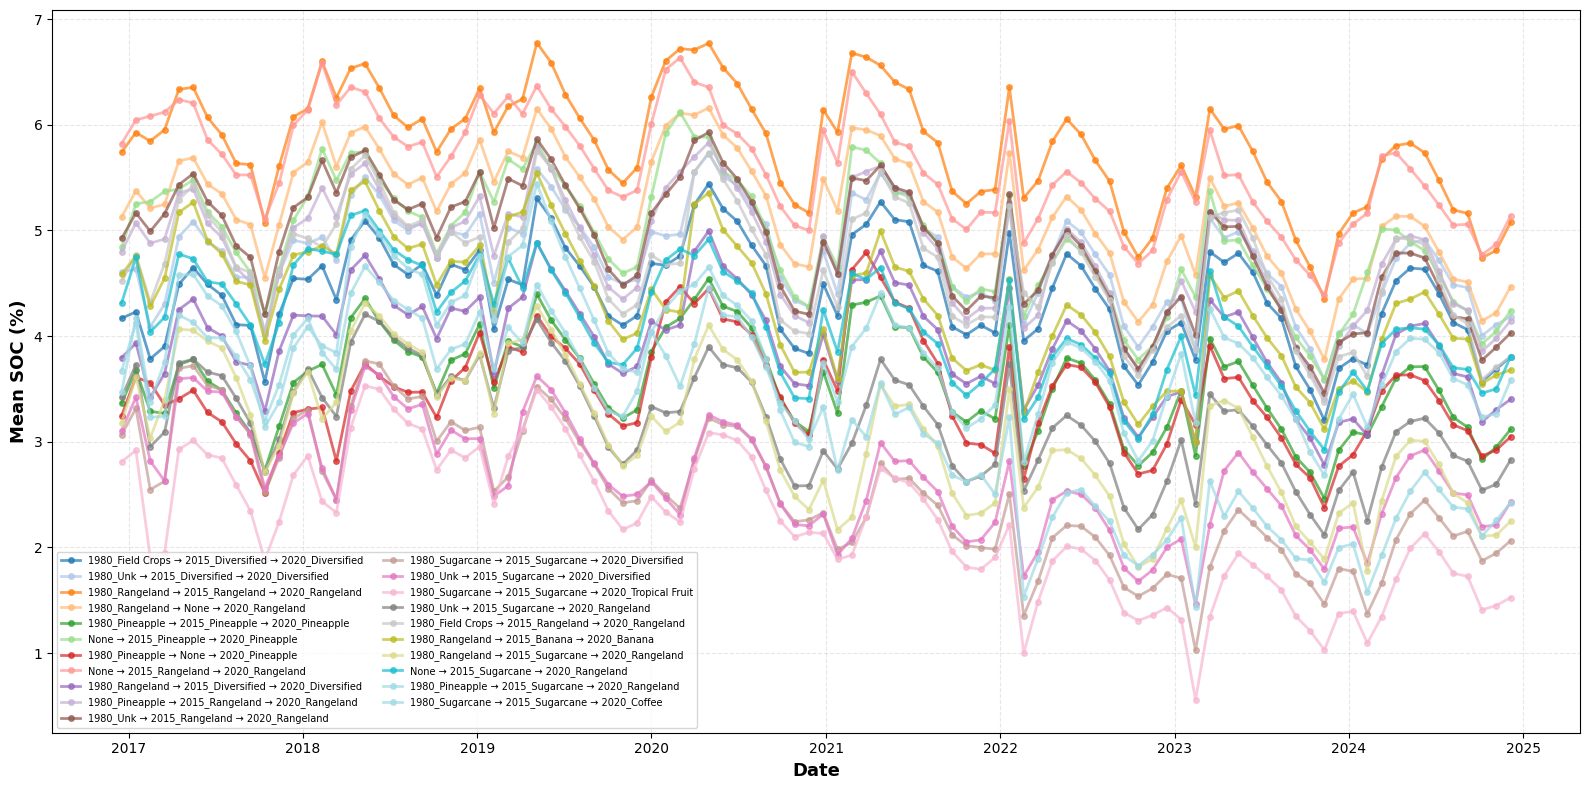


LAND USE TRANSITION SUMMARY

1980_Field Crops → 2015_Diversified → 2020_Diversified:
  Number of points: 1515
  Mean SOC (all dates): 4.40 ± 1.20%
  Change from 2016 to 2024: -0.36% (-8.7%)

1980_Unk → 2015_Diversified → 2020_Diversified:
  Number of points: 217
  Mean SOC (all dates): 4.74 ± 1.48%
  Change from 2016 to 2024: -0.42% (-9.2%)

1980_Rangeland → 2015_Rangeland → 2020_Rangeland:
  Number of points: 75728
  Mean SOC (all dates): 5.81 ± 1.69%
  Change from 2016 to 2024: -0.67% (-11.6%)

1980_Rangeland → None → 2020_Rangeland:
  Number of points: 77
  Mean SOC (all dates): 5.19 ± 1.82%
  Change from 2016 to 2024: -0.66% (-12.9%)

1980_Pineapple → 2015_Pineapple → 2020_Pineapple:
  Number of points: 3857
  Mean SOC (all dates): 3.56 ± 0.75%
  Change from 2016 to 2024: -0.25% (-7.3%)

None → 2015_Pineapple → 2020_Pineapple:
  Number of points: 87
  Mean SOC (all dates): 4.91 ± 1.01%
  Change from 2016 to 2024: -0.60% (-12.4%)

1980_Pineapple → None → 2020_Pineapple:
  Number of

In [40]:
# Get all date columns from carbon_subset dataframe
date_cols = [col for col in carbon_subset.columns if col.startswith('d_')]

# Extract dates from column names
dates = [datetime.strptime(col.replace('d_', ''), '%Y%m%d') for col in date_cols]

# Get unique land use transitions
carbon_subset['land_use_transition'] = (carbon_subset['Ag_year'].fillna('None') + ' → ' +
                                         carbon_subset['2015Ag_year'].fillna('None') + ' → ' +
                                         carbon_subset['2020Ag_year'].fillna('None'))

# Get all unique transitions
transitions = carbon_subset['land_use_transition'].unique()
print(f"Found {len(transitions)} unique land use transitions")

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Define colors for each transition
colors = plt.cm.tab20(np.linspace(0, 1, len(transitions)))

# Plot for each land use transition
for idx, transition in enumerate(transitions):
    # Filter data for this transition
    transition_data = carbon_subset[carbon_subset['land_use_transition'] == transition]

    # Calculate mean for each date
    yearly_means = []
    for date_col in date_cols:
        yearly_means.append(transition_data[date_col].mean())

    # Plot
    ax.plot(dates, yearly_means,
            marker='o', linewidth=2, markersize=4,
            label=f'{transition}',
            color=colors[idx], alpha=0.7)

ax.set_xlabel('Date', fontsize=13, fontweight='bold')
ax.set_ylabel('Mean SOC (%)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='best', fontsize=7, ncol=2)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("LAND USE TRANSITION SUMMARY")
print("="*80)

for transition in transitions:
    transition_data = carbon_subset[carbon_subset['land_use_transition'] == transition]
    print(f"\n{transition}:")
    print(f"  Number of points: {len(transition_data)}")

    # Calculate overall mean across all dates
    all_date_values = transition_data[date_cols].values.flatten()
    print(f"  Mean SOC (all dates): {np.nanmean(all_date_values):.2f} ± {np.nanstd(all_date_values):.2f}%")

    # Calculate trend
    first_date_mean = transition_data[date_cols[0]].mean()
    last_date_mean = transition_data[date_cols[-1]].mean()
    change = last_date_mean - first_date_mean
    pct_change = (change / first_date_mean) * 100
    print(f"  Change from {dates[0].year} to {dates[-1].year}: {change:+.2f}% ({pct_change:+.1f}%)")

Found 21 unique land use transitions


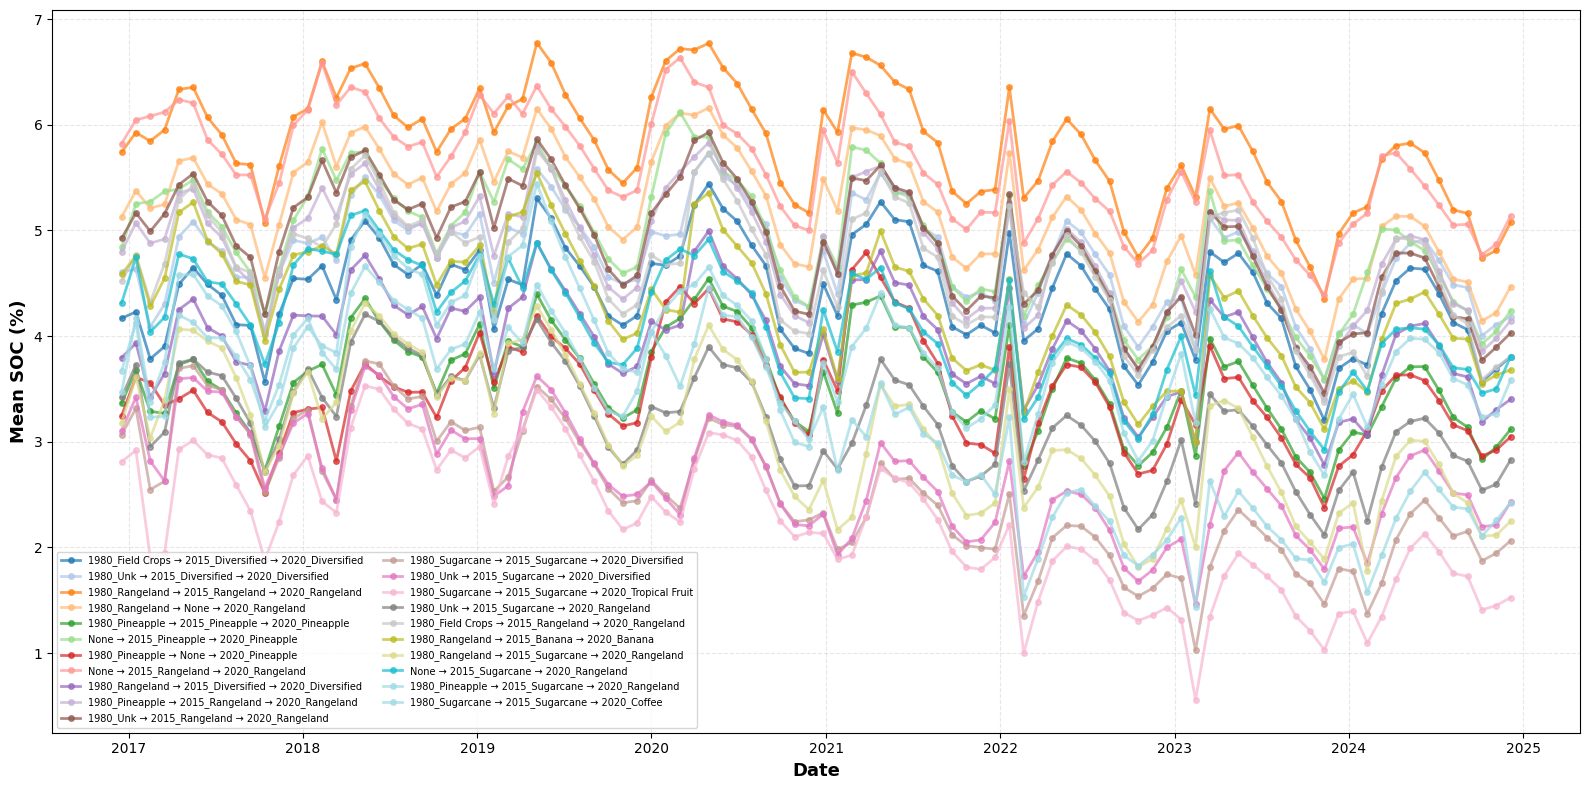


LAND USE TRANSITION SUMMARY

1980_Field Crops → 2015_Diversified → 2020_Diversified:
  Number of points: 1515
  Mean SOC (all dates): 4.40 ± 1.20%
  Starting carbon (2016): 4.17%
  Ending carbon (2024): 3.80%
  Change: -0.36% (-8.7%)

1980_Unk → 2015_Diversified → 2020_Diversified:
  Number of points: 217
  Mean SOC (all dates): 4.74 ± 1.48%
  Starting carbon (2016): 4.61%
  Ending carbon (2024): 4.18%
  Change: -0.42% (-9.2%)

1980_Rangeland → 2015_Rangeland → 2020_Rangeland:
  Number of points: 75728
  Mean SOC (all dates): 5.81 ± 1.69%
  Starting carbon (2016): 5.74%
  Ending carbon (2024): 5.07%
  Change: -0.67% (-11.6%)

1980_Rangeland → None → 2020_Rangeland:
  Number of points: 77
  Mean SOC (all dates): 5.19 ± 1.82%
  Starting carbon (2016): 5.13%
  Ending carbon (2024): 4.47%
  Change: -0.66% (-12.9%)

1980_Pineapple → 2015_Pineapple → 2020_Pineapple:
  Number of points: 3857
  Mean SOC (all dates): 3.56 ± 0.75%
  Starting carbon (2016): 3.36%
  Ending carbon (2024): 3.12%
  

,transition,n_points,mean_soc,std_soc,starting_carbon,ending_carbon,change,pct_change
2,1980_Rangeland → 2015_Rangeland → 2020_Rangeland,75728,5.810925,1.690502,5.740759,5.074658,-0.666101,-11.603021
11,1980_Sugarcane → 2015_Sugarcane → 2020_Diversi...,10573,2.484582,0.861364,3.067446,2.062906,-1.004541,-32.748434
9,1980_Pineapple → 2015_Rangeland → 2020_Rangeland,4031,4.786409,0.837885,4.799846,4.145772,-0.654074,-13.626974
4,1980_Pineapple → 2015_Pineapple → 2020_Pineapple,3857,3.557174,0.745770,3.364371,3.117419,-0.246951,-7.340191
13,1980_Sugarcane → 2015_Sugarcane → 2020_Tropica...,3022,2.213265,0.854277,2.810677,1.524840,-1.285837,-45.748304
19,1980_Pineapple → 2015_Sugarcane → 2020_Rangeland,2691,3.742553,0.724888,3.669311,3.582094,-0.087217,-2.376937
7,None → 2015_Rangeland → 2020_Rangeland,2499,5.608712,1.078565,5.822050,5.136888,-0.685162,-11.768405
8,1980_Rangeland → 2015_Diversified → 2020_Diver...,2244,3.930851,1.045199,3.796498,3.401090,-0.395408,-10.415067
20,1980_Sugarcane → 2015_Sugarcane → 2020_Coffee,1666,3.277146,1.140536,3.466180,2.420851,-1.045329,-30.157950
0,1980_Field Crops → 2015_Diversified → 2020_Div...,1515,4.395586,1.198076,4.168520,3.804275,-0.364245,-8.737996


In [42]:
# Get all date columns from carbon_subset dataframe
date_cols = [col for col in carbon_subset.columns if col.startswith('d_')]

# Extract dates from column names
dates = [datetime.strptime(col.replace('d_', ''), '%Y%m%d') for col in date_cols]

# Create land use transition column that includes NaN values
carbon_subset['land_use_transition'] = (carbon_subset['Ag_year'].astype(str) + ' → ' +
                                         carbon_subset['2015Ag_year'].astype(str) + ' → ' +
                                         carbon_subset['2020Ag_year'].astype(str))

# Get all unique transitions
transitions = carbon_subset['land_use_transition'].unique()
print(f"Found {len(transitions)} unique land use transitions")

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Define colors for each transition
colors = plt.cm.tab20(np.linspace(0, 1, len(transitions)))

# Plot for each land use transition
for idx, transition in enumerate(transitions):
    # Filter data for this transition
    transition_data = carbon_subset[carbon_subset['land_use_transition'] == transition]

    # Calculate mean for each date
    yearly_means = []
    for date_col in date_cols:
        yearly_means.append(transition_data[date_col].mean())

    # Plot
    ax.plot(dates, yearly_means,
            marker='o', linewidth=2, markersize=4,
            label=f'{transition}',
            color=colors[idx], alpha=0.7)

ax.set_xlabel('Date', fontsize=13, fontweight='bold')
ax.set_ylabel('Mean SOC (%)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='best', fontsize=7, ncol=2)
plt.tight_layout()
plt.show()

# Print summary statistics with starting and ending carbon
print("\n" + "="*80)
print("LAND USE TRANSITION SUMMARY")
print("="*80)

# Create summary dataframe
summary_data = []

for transition in transitions:
    transition_data = carbon_subset[carbon_subset['land_use_transition'] == transition]

    # Calculate overall mean across all dates
    all_date_values = transition_data[date_cols].values.flatten()
    mean_soc = np.nanmean(all_date_values)
    std_soc = np.nanstd(all_date_values)

    # Calculate starting and ending carbon
    starting_carbon = transition_data[date_cols[0]].mean()
    ending_carbon = transition_data[date_cols[-1]].mean()
    change = ending_carbon - starting_carbon
    pct_change = (change / starting_carbon) * 100

    print(f"\n{transition}:")
    print(f"  Number of points: {len(transition_data)}")
    print(f"  Mean SOC (all dates): {mean_soc:.2f} ± {std_soc:.2f}%")
    print(f"  Starting carbon ({dates[0].year}): {starting_carbon:.2f}%")
    print(f"  Ending carbon ({dates[-1].year}): {ending_carbon:.2f}%")
    print(f"  Change: {change:+.2f}% ({pct_change:+.1f}%)")

    # Add to summary data
    summary_data.append({
        'transition': transition,
        'n_points': len(transition_data),
        'mean_soc': mean_soc,
        'std_soc': std_soc,
        'starting_carbon': starting_carbon,
        'ending_carbon': ending_carbon,
        'change': change,
        'pct_change': pct_change
    })

# Create summary dataframe
import pandas as pd
summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('n_points', ascending=False)

print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)
display(summary_df)

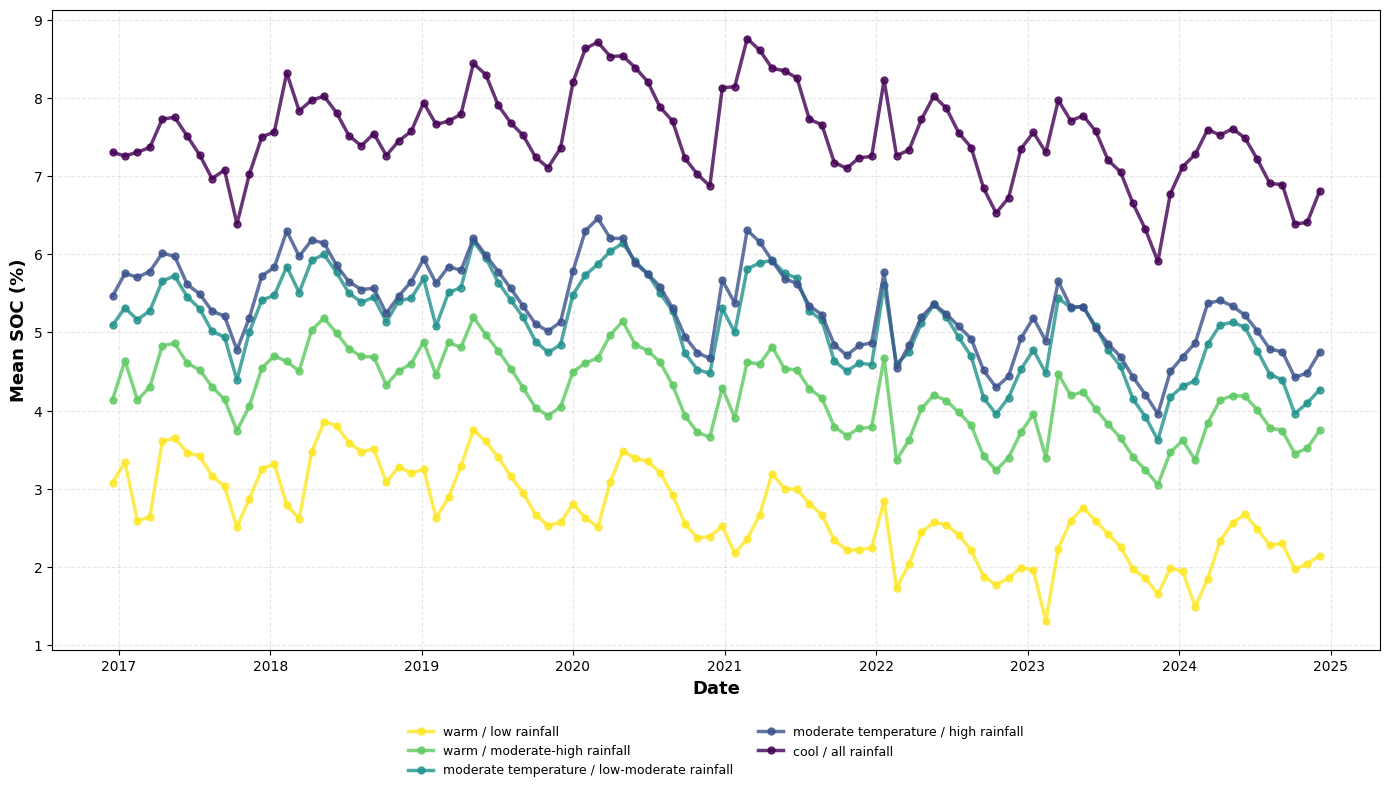


CLIMATE BIN SUMMARY - PREDICTED CARBON

warm / low rainfall:
  Number of points: 19508
  Mean SOC (all dates): 2.68 ± 0.96%
  Change from 2016 to 2024: -0.93% (-30.3%)

warm / moderate-high rainfall:
  Number of points: 13145
  Mean SOC (all dates): 4.21 ± 1.22%
  Change from 2016 to 2024: -0.39% (-9.5%)

moderate temperature / low-moderate rainfall:
  Number of points: 32753
  Mean SOC (all dates): 5.11 ± 1.37%
  Change from 2016 to 2024: -0.82% (-16.2%)

moderate temperature / high rainfall:
  Number of points: 23556
  Mean SOC (all dates): 5.34 ± 1.12%
  Change from 2016 to 2024: -0.72% (-13.1%)

cool / all rainfall:
  Number of points: 21464
  Mean SOC (all dates): 7.53 ± 1.14%
  Change from 2016 to 2024: -0.49% (-6.8%)


In [64]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# Get all the monthly carbon columns
date_cols = [col for col in carbon_subset.columns if col.startswith('d_')]

# Extract dates from column names
dates = [datetime.strptime(col.replace('d_', ''), '%Y%m%d') for col in date_cols]

# Define the order for climate bins with fixed colors
climate_order = [
    'warm / low rainfall',
    'warm / moderate-high rainfall',
    'moderate temperature / low-moderate rainfall',
    'moderate temperature / high rainfall',
    'cool / all rainfall'
]

# Create a color map for all climate bins
all_colors = plt.cm.viridis(np.linspace(1, 0, len(climate_order)))
color_map = {climate: all_colors[i] for i, climate in enumerate(climate_order)}

# Filter to only climate bins that exist in the data
climate_bins = [c for c in climate_order if c in carbon_subset['climate_description'].values]

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot for each climate bin
for climate in climate_bins:
    # Filter data for this climate bin
    climate_data = carbon_subset[carbon_subset['climate_description'] == climate]

    # Calculate mean for each date
    yearly_means = []
    for date_col in date_cols:
        yearly_means.append(climate_data[date_col].mean())

    # Plot using the fixed color from color_map
    ax.plot(dates, yearly_means,
            marker='o', linewidth=2.5, markersize=5,
            label=f'{climate}',
            color=color_map[climate], alpha=0.8)

ax.set_xlabel('Date', fontsize=13, fontweight='bold')
ax.set_ylabel('Mean SOC (%)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')

# Move legend below x-axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fontsize=9, ncol=2, frameon=False)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("CLIMATE BIN SUMMARY - PREDICTED CARBON")
print("="*80)

for climate in climate_bins:
    climate_data = carbon_subset[carbon_subset['climate_description'] == climate]
    print(f"\n{climate}:")
    print(f"  Number of points: {len(climate_data)}")

    # Calculate overall mean across all dates
    all_date_values = climate_data[date_cols].values.flatten()
    print(f"  Mean SOC (all dates): {np.nanmean(all_date_values):.2f} ± {np.nanstd(all_date_values):.2f}%")

    # Calculate trend
    first_date_mean = climate_data[date_cols[0]].mean()
    last_date_mean = climate_data[date_cols[-1]].mean()
    change = last_date_mean - first_date_mean
    pct_change = (change / first_date_mean) * 100
    print(f"  Change from {dates[0].year} to {dates[-1].year}: {change:+.2f}% ({pct_change:+.1f}%)")

In [43]:
# Load measured SOC data
measured = gpd.read_file('/content/Maui_0_20_subregion_measured-6.gpkg')

In [46]:
measured = measured.rename(columns={'1': 'climate_bin'})

In [48]:
# Define climate bins
bin_descriptions = {
    1: "cool / all rainfall",
    10: "moderate temperature / low-moderate rainfall",
    11: "moderate temperature / high rainfall",
    20: "warm / low rainfall",
    21: "warm / moderate-high rainfall"
}

# Map the descriptions to a new column
measured['climate_description'] = measured['climate_bin'].map(bin_descriptions)

# Check the result
print(measured[['climate_bin', 'climate_description']].head())

   climate_bin  climate_description
0           20  warm / low rainfall
1           20  warm / low rainfall
2           20  warm / low rainfall
3           20  warm / low rainfall
4           20  warm / low rainfall


In [51]:
measured.columns

Index(['wkt_geom', 'unique_id', 'source_dataset', 'island', 'location',
       'latitude', 'longitude', 'month_sampled', 'year_sampled',
       'depth_bottom', 'imp_c_perc', '1980Ag_year', 'depth_top', '2015Ag_year',
       '2020Ag_year', '2015AbAg_year', '2020AbAg_year', 'TaxClass',
       'SoilOrder', 'Suborder', 'climate_bin', 'geometry',
       'climate_description'],
      dtype='object')

In [53]:
# Summary stats
summary_by_year = measured.groupby('year_sampled')['imp_c_perc'].describe()
print("Detailed Summary Statistics:")
display(summary_by_year)

Detailed Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
year_sampled,,,,,,,,
1963,1.0,15.700000,NaN,15.700000,15.700000,15.700000,15.700000,15.700000
1965,1.0,1.850000,NaN,1.850000,1.850000,1.850000,1.850000,1.850000
1983,8.0,5.852500,3.950507,1.450000,2.707500,5.010000,9.595000,11.480000
1989,1.0,4.740000,NaN,4.740000,4.740000,4.740000,4.740000,4.740000
1997,4.0,7.165000,2.642858,5.250000,5.812500,6.170000,7.522500,11.070000
1998,3.0,10.273333,4.861094,6.540000,7.525000,8.510000,12.140000,15.770000
2001,1.0,0.970000,NaN,0.970000,0.970000,0.970000,0.970000,0.970000
2011,41.0,1.595854,0.266458,1.200000,1.400000,1.500000,1.790000,2.250000
2012,11.0,1.650909,0.294600,1.260000,1.400000,1.620000,1.830000,2.130000


In [55]:
# Pivot table - mean by year and suborder
pivot_mean = measured.pivot_table(
    values='imp_c_perc',
    index='Suborder',
    columns='year_sampled',
    aggfunc='mean'
).round(2)

# Replace NaN with dash for display
pivot_display = pivot_mean.fillna('-')

display(pivot_display)

Mean imp_c_perc by Suborder and Year:


year_sampled,1963,1965,1983,1989,1997,1998,2001,2011,2012,2013,2014,2017,2018,2019,2022,2023,2024,2025
Suborder,,,,,,,,,,,,,,,,,,
Andepts,-,-,-,-,-,-,-,-,-,-,-,9.56,-,-,-,-,-,-
Aquepts,-,-,-,-,-,6.54,-,-,-,-,-,-,-,-,-,-,-,-
Cambids,-,-,5.03,-,-,-,-,1.39,1.4,1.35,1.4,-,-,-,1.1,1.08,0.81,-
Humults,-,-,3.1,4.74,-,-,-,-,-,-,-,-,2.43,-,1.7,1.66,6.37,-
Orthents,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.05,-
Torrox,-,-,1.53,-,-,-,-,1.61,1.64,1.65,1.7,-,-,-,-,-,-,-
Udands,-,-,-,-,7.16,-,-,-,-,-,-,12.55,30.6,-,12.2,-,16.07,-
Ustands,15.7,-,9.03,-,-,12.14,-,1.38,1.34,1.32,1.37,9.58,13.1,-,12.35,7.22,13.54,16.15
Ustepts,-,-,-,-,-,-,0.97,-,-,-,-,6.59,4.45,-,4.53,4.44,-,-


In [56]:
# Pivot table - mean by year and climate bin
pivot_mean = measured.pivot_table(
    values='imp_c_perc',
    index='climate_description',
    columns='year_sampled',
    aggfunc='mean'
).round(2)

# Replace NaN with dash for display
pivot_display = pivot_mean.fillna('-')

display(pivot_display)

year_sampled,1963,1965,1983,1989,1997,1998,2001,2011,2012,2013,2014,2017,2018,2019,2022,2023,2024,2025
climate_description,,,,,,,,,,,,,,,,,,
cool / all rainfall,15.7,-,10.52,-,7.16,10.27,-,-,-,-,-,10.6,17.48,-,12.71,7.09,14.33,16.15
moderate temperature / high rainfall,-,-,3.1,4.74,-,-,-,-,-,-,-,6.99,-,-,2.82,2.77,6.21,-
moderate temperature / low-moderate rainfall,-,-,5.28,-,-,-,0.97,1.38,1.34,1.32,1.37,7.95,4.65,-,5.73,4.22,1.05,-
warm / low rainfall,-,-,-,-,-,-,-,1.76,1.82,1.74,1.81,-,-,-,-,-,-,-
warm / moderate-high rainfall,-,1.85,1.53,-,-,-,-,1.39,1.4,1.35,1.4,-,1.84,1.58,2.28,2.24,0.81,-


In [58]:
# Summary by climate bin and year
summary_by_climate_year = measured.groupby(['climate_description', 'year_sampled'])['imp_c_perc'].describe()
print("Detailed Summary Statistics by Climate and Year:")
display(summary_by_climate_year)

Detailed Summary Statistics by Climate and Year:


count       mean  \
climate_description                          year_sampled                     
cool / all rainfall                          1963            1.0  15.700000   
                                             1983            2.0  10.525000   
                                             1997            4.0   7.165000   
                                             1998            3.0  10.273333   
                                             2017          137.0  10.596350   
                                             2018           12.0  17.477956   
                                             2022           39.0  12.708230   
                                             2023            1.0   7.094750   
                                             2024           26.0  14.325760   
                                             2025           10.0  16.149575   
moderate temperature / high rainfall         1983            1.0   3.100000   
                                             1989            1.0   4.740000   
                                             2017            9.0   6.987778   
                                             2022            2.0   2.818974   
                                             2023            2.0   2.765750   
                                             2024            4.0   6.213687   
moderate temperature / low-moderate rainfall 1983            4.0   5.285000   
                                             2001            1.0   0.970000   
                                             2011            7.0   1.378571   
                                             2012            3.0   1.343333   
                                             2013            3.0   1.320000   
                                             2014            3.0   1.366667   
                                             2017           58.0   7.948448   
                                             2018            9.0   4.648008   
                                             2022            4.0   5.727515   
                                             2023            2.0   4.218000   
                                             2024            1.0   1.054500   
warm / low rainfall                          2011           23.0   1.762174   
                                             2012            7.0   1.818571   
                                             2013            9.0   1.736667   
                                             2014            9.0   1.812222   
warm / moderate-high rainfall                1965            1.0   1.850000   
                                             1983            1.0   1.530000   
                                             2011           11.0   1.386364   
                                             2012            1.0   1.400000   
                                             2013            1.0   1.350000   
                                             2014            1.0   1.400000   
                                             2018            3.0   1.838462   
                                             2019            6.0   1.576049   
                                             2022            1.0   2.281578   
                                             2023            1.0   2.238500   
                                             2024            1.0   0.814000   

                                                                std  \
climate_description                          year_sampled             
cool / all rainfall                          1963               NaN   
                                             1983          1.350574   
                                             1997          2.642858   
                                             1998          4.861094   
                                             2017          2.217771   
                                             2018          9.235950   
              

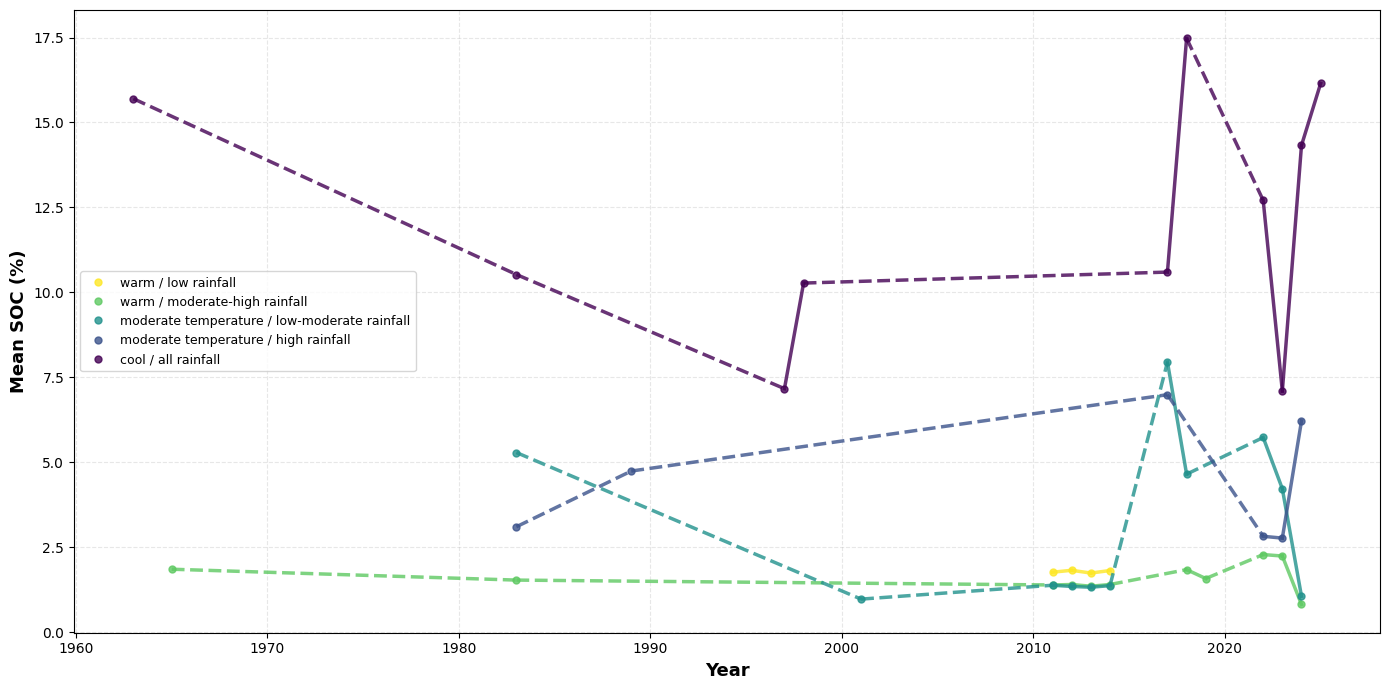


CLIMATE BIN SUMMARY

warm / low rainfall:
  Number of samples: 48
  Years with data: [np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014)]
  Mean SOC (all years): 1.77 ± 0.21%
  Change from 2011 to 2014: +0.05% (+2.8%)

warm / moderate-high rainfall:
  Number of samples: 28
  Years with data: [np.int32(1965), np.int32(1983), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2018), np.int32(2019), np.int32(2022), np.int32(2023), np.int32(2024)]
  Mean SOC (all years): 1.54 ± 0.31%
  Change from 1965 to 2024: -1.04% (-56.0%)

moderate temperature / low-moderate rainfall:
  Number of samples: 95
  Years with data: [np.int32(1983), np.int32(2001), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2017), np.int32(2018), np.int32(2022), np.int32(2023), np.int32(2024)]
  Mean SOC (all years): 6.10 ± 3.25%
  Change from 1983 to 2024: -4.23% (-80.0%)

moderate temperature / high rainfall:
  Number of samples: 19
  Years with data: [np.in

In [65]:
import matplotlib.pyplot as plt
import numpy as np

color_map = {climate: all_colors[i] for i, climate in enumerate(climate_order)}

# Define the order for climate bins
climate_order = [
    'warm / low rainfall',
    'warm / moderate-high rainfall',
    'moderate temperature / low-moderate rainfall',
    'moderate temperature / high rainfall',
    'cool / all rainfall'
]

# Filter to only climate bins that exist in the data
climate_bins = [c for c in climate_order if c in measured['climate_description'].values]

# Get unique years
years = sorted(measured['year_sampled'].unique())

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Define colors for each climate bin
color=color_map[climate]

# Plot for each climate bin
for idx, climate in enumerate(climate_bins):
    # Filter data for this climate bin
    climate_data = measured[measured['climate_description'] == climate]

    # Get years with data for this climate bin
    climate_years = sorted(climate_data['year_sampled'].unique())

    # Calculate mean for each year that has data
    yearly_means = []
    for year in climate_years:
        year_data = climate_data[climate_data['year_sampled'] == year]['imp_c_perc']
        yearly_means.append(year_data.mean())

    # Plot with segments - solid where continuous, dashed where gaps
    for i in range(len(climate_years) - 1):
        year_start = climate_years[i]
        year_end = climate_years[i + 1]

        # Check if years are consecutive
        if year_end - year_start == 1:
            # Solid line for consecutive years
            ax.plot([year_start, year_end],
                   [yearly_means[i], yearly_means[i + 1]],
                   color=colors[idx], linewidth=2.5, alpha=0.8,
                   linestyle='-')
        else:
            # Dashed line for gaps
            ax.plot([year_start, year_end],
                   [yearly_means[i], yearly_means[i + 1]],
                   color=colors[idx], linewidth=2.5, alpha=0.8,
                   linestyle='--')

    # Plot markers
    ax.plot(climate_years, yearly_means,
            marker='o', markersize=5,
            color=colors[idx], alpha=0.8,
            linestyle='', label=f'{climate}')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Mean SOC (%)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='best', fontsize=9)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("CLIMATE BIN SUMMARY")
print("="*80)

for climate in climate_bins:
    climate_data = measured[measured['climate_description'] == climate]
    climate_years = sorted(climate_data['year_sampled'].unique())

    print(f"\n{climate}:")
    print(f"  Number of samples: {len(climate_data)}")
    print(f"  Years with data: {climate_years}")
    print(f"  Mean SOC (all years): {climate_data['imp_c_perc'].mean():.2f} ± {climate_data['imp_c_perc'].std():.2f}%")

    # Calculate trend
    first_year_data = climate_data[climate_data['year_sampled'] == climate_years[0]]['imp_c_perc']
    last_year_data = climate_data[climate_data['year_sampled'] == climate_years[-1]]['imp_c_perc']

    first_year_mean = first_year_data.mean()
    last_year_mean = last_year_data.mean()
    change = last_year_mean - first_year_mean
    pct_change = (change / first_year_mean) * 100
    print(f"  Change from {climate_years[0]} to {climate_years[-1]}: {change:+.2f}% ({pct_change:+.1f}%)")

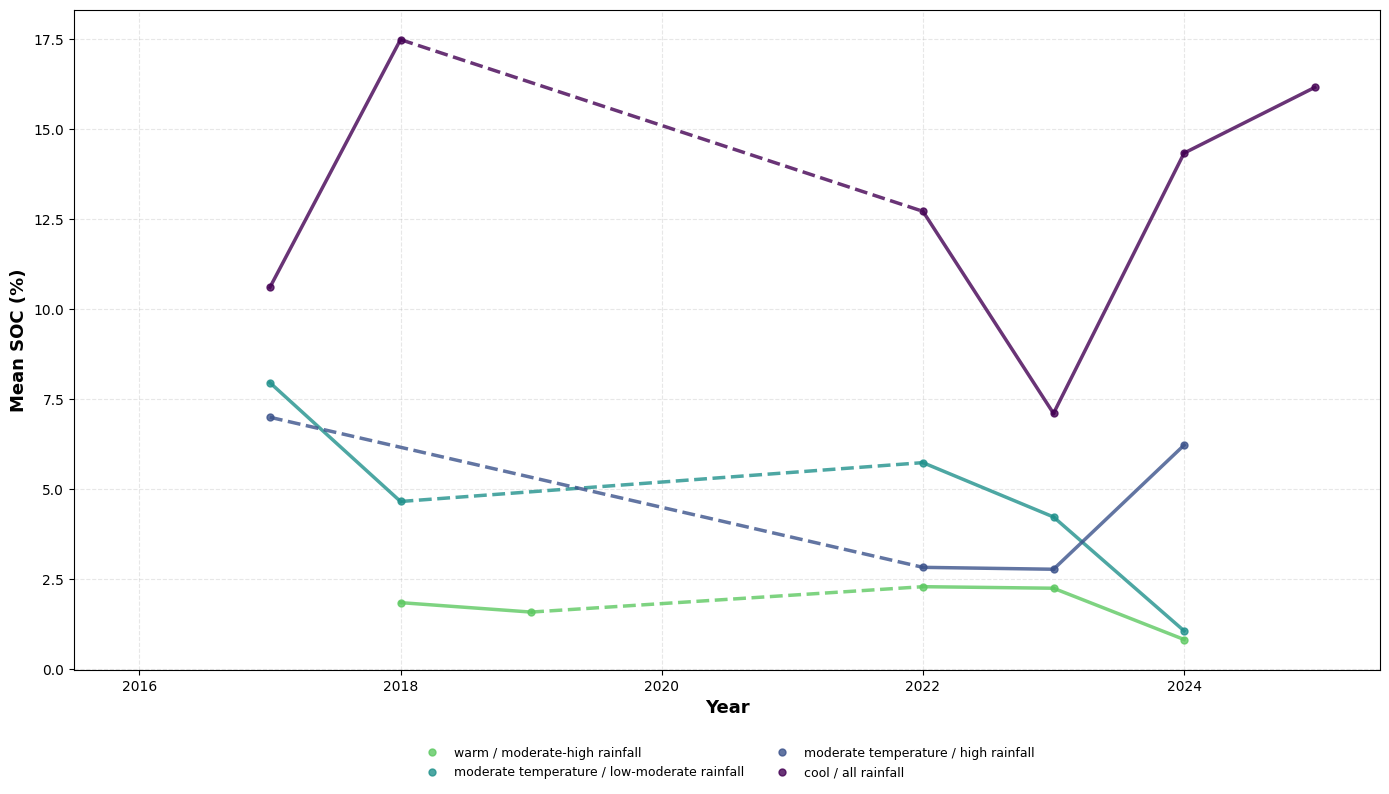


CLIMATE BIN SUMMARY (2016-2025)

warm / moderate-high rainfall:
  Number of samples: 12
  Years with data: [np.int32(2018), np.int32(2019), np.int32(2022), np.int32(2023), np.int32(2024)]
  Mean SOC (2016-2025): 1.69 ± 0.40%
  Change from 2018 to 2024: -1.02% (-55.7%)

moderate temperature / low-moderate rainfall:
  Number of samples: 74
  Years with data: [np.int32(2017), np.int32(2018), np.int32(2022), np.int32(2023), np.int32(2024)]
  Mean SOC (2016-2025): 7.23 ± 2.54%
  Change from 2017 to 2024: -6.89% (-86.7%)

moderate temperature / high rainfall:
  Number of samples: 17
  Years with data: [np.int32(2017), np.int32(2022), np.int32(2023), np.int32(2024)]
  Mean SOC (2016-2025): 5.82 ± 2.27%
  Change from 2017 to 2024: -0.77% (-11.1%)

cool / all rainfall:
  Number of samples: 225
  Years with data: [np.int32(2017), np.int32(2018), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]
  Mean SOC (2016-2025): 11.99 ± 3.91%
  Change from 2017 to 2025: +5.55% (+52.4%)


In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data to 2016-2025
measured_recent = measured[(measured['year_sampled'] >= 2016) & (measured['year_sampled'] <= 2025)]

# Define the order for climate bins
climate_order = [
    'warm / low rainfall',
    'warm / moderate-high rainfall',
    'moderate temperature / low-moderate rainfall',
    'moderate temperature / high rainfall',
    'cool / all rainfall'
]

# Create a color map for all climate bins
all_colors = plt.cm.viridis(np.linspace(1, 0, len(climate_order)))
color_map = {climate: all_colors[i] for i, climate in enumerate(climate_order)}

# Filter to only climate bins that exist in the data
climate_bins = [c for c in climate_order if c in measured_recent['climate_description'].values]

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot for each climate bin
for climate in climate_bins:
    # Filter data for this climate bin
    climate_data = measured_recent[measured_recent['climate_description'] == climate]

    # Get years with data for this climate bin
    climate_years = sorted(climate_data['year_sampled'].unique())

    # Calculate mean for each year that has data
    yearly_means = []
    for year in climate_years:
        year_data = climate_data[climate_data['year_sampled'] == year]['imp_c_perc']
        yearly_means.append(year_data.mean())

    # Plot with segments - solid where continuous, dashed where gaps
    for i in range(len(climate_years) - 1):
        year_start = climate_years[i]
        year_end = climate_years[i + 1]

        # Check if years are consecutive
        if year_end - year_start == 1:
            # Solid line for consecutive years
            ax.plot([year_start, year_end],
                   [yearly_means[i], yearly_means[i + 1]],
                   color=color_map[climate], linewidth=2.5, alpha=0.8,
                   linestyle='-')
        else:
            # Dashed line for gaps
            ax.plot([year_start, year_end],
                   [yearly_means[i], yearly_means[i + 1]],
                   color=color_map[climate], linewidth=2.5, alpha=0.8,
                   linestyle='--')

    # Plot markers
    ax.plot(climate_years, yearly_means,
            marker='o', markersize=5,
            color=color_map[climate], alpha=0.8,
            linestyle='', label=f'{climate}')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Mean SOC (%)', fontsize=13, fontweight='bold')
ax.set_xlim(2015.5, 2025.5)  # Set x-axis limits
ax.grid(True, alpha=0.3, linestyle='--')

# Move legend below x-axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fontsize=9, ncol=2, frameon=False)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("CLIMATE BIN SUMMARY (2016-2025)")
print("="*80)

for climate in climate_bins:
    climate_data = measured_recent[measured_recent['climate_description'] == climate]
    climate_years = sorted(climate_data['year_sampled'].unique())

    print(f"\n{climate}:")
    print(f"  Number of samples: {len(climate_data)}")
    print(f"  Years with data: {climate_years}")
    print(f"  Mean SOC (2016-2025): {climate_data['imp_c_perc'].mean():.2f} ± {climate_data['imp_c_perc'].std():.2f}%")

    if len(climate_years) > 1:
        # Calculate trend
        first_year_data = climate_data[climate_data['year_sampled'] == climate_years[0]]['imp_c_perc']
        last_year_data = climate_data[climate_data['year_sampled'] == climate_years[-1]]['imp_c_perc']

        first_year_mean = first_year_data.mean()
        last_year_mean = last_year_data.mean()
        change = last_year_mean - first_year_mean
        pct_change = (change / first_year_mean) * 100
        print(f"  Change from {climate_years[0]} to {climate_years[-1]}: {change:+.2f}% ({pct_change:+.1f}%)")